# Unsupervised Learning Assignment

### Laurence Warner

### Colleges

In [57]:
import pandas as pd
import sklearn.preprocessing as skprep
import sklearn.decomposition as skde

In [58]:
df = pd.read_csv("../../assignments/unsupervised-learning/data/College.csv")

Convert Private to binary integer variable.

In [59]:
df = pd.get_dummies(df)
del df['Private_No']

Scale data to standard normal distribution

In [63]:
data = skprep.scale(df)

In [65]:
new_df = pd.DataFrame(data, columns = df.columns)
new_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252,0.612553
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262,0.612553
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767,0.612553
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504,0.612553
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613,0.612553


In [66]:
pca = skde.PCA().fit(new_df)

In [67]:
comp = pca.components_.T

In [68]:
comp_df = pd.DataFrame(comp, index = new_df.columns)
comp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Apps,0.199630,0.343621,0.004821,0.305009,-0.022968,-0.008618,-0.061047,-0.099177,-0.084087,0.058147,0.010378,0.041806,0.037404,0.595364,0.080683,0.133747,0.458603,0.363283
Accept,0.153797,0.372557,-0.025351,0.317486,0.031438,0.013074,-0.015474,-0.054225,-0.165274,0.089482,-0.142627,0.004545,-0.073616,0.293398,0.033349,-0.146347,-0.512188,-0.547462
Enroll,0.117797,0.399697,-0.027576,0.204836,-0.065667,-0.043065,-0.008237,0.063261,-0.116813,0.074073,-0.105826,-0.034260,0.059072,-0.446273,-0.081525,0.028481,-0.403907,0.607174
Top10perc,0.360349,-0.016238,0.004681,-0.107519,-0.388227,-0.059923,-0.144406,-0.097143,0.355676,0.059358,0.022126,-0.015181,0.044352,0.000092,-0.106170,0.697422,-0.148018,-0.146308
Top25perc,0.344751,0.017730,-0.058948,-0.146260,-0.409809,0.020615,-0.079889,-0.078063,0.422445,0.043560,-0.138169,-0.231232,-0.099783,0.023782,0.148674,-0.616897,0.050194,0.080606


In [69]:
import matplotlib.pyplot as plt

In [70]:
plt.scatter(comp_df[0], comp_df[1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )

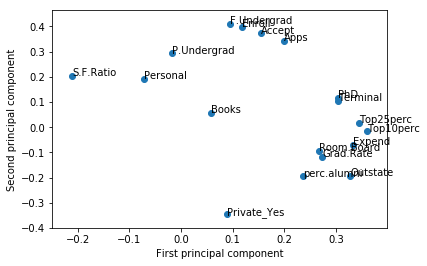

In [71]:
plt.show()

##### First principal component
Very negative: S.F. Ratio.
Very positive: Top 10 percent, top 25 percent, expend, outstate etc.
This principal component looks like it is related to quality of students

##### Second principal component
Very negative: Private
Very positive: F. Undergrad, Accept, Apps
This principal component looks related to popularity of institution.

Q2

In [72]:
expl = pca.explained_variance_

In [73]:
expl_r = pca.explained_variance_ratio_

In [74]:
expl

array([ 5.4669693 ,  5.06260221,  1.19111709,  1.05748968,  0.93660995,
        0.84928662,  0.61729328,  0.58842991,  0.53272029,  0.41040103,
        0.35828209,  0.30741128,  0.18579613,  0.16778588,  0.14389933,
        0.0880174 ,  0.03607629,  0.02300814])

In [75]:
sum(expl)

18.02319587628865

In [76]:
sum(expl_r)

1.0000000000000002

Proportion of variance explained by all principal components: 1. By definition, all principal components explain all fo the variance!

In [77]:
len(expl_r)

18

In [78]:
import numpy as np

In [79]:
cumsum = np.cumsum(expl_r)

In [82]:
plt.plot(range(18), cumsum)
plt.xlabel('number of principal components')
plt.ylabel('Proportion of variance explained')

Text(0,0.5,'Proportion of variance explained')

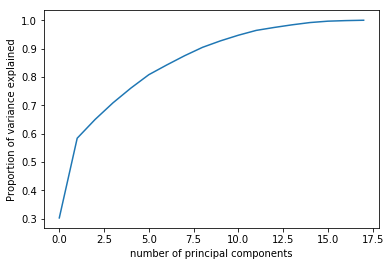

In [83]:
plt.show()

In [84]:
print("Variance explained by first two principal components is {}".format(round(cumsum[1], 3)))

Variance explained by first two principal components is 0.584


### Part 2: Clustering states

Q1

In [85]:
arrests = pd.read_csv("../../assignments/unsupervised-learning/data/USArrests.csv", index_col = 0)

In [88]:
arrests_scaled = pd.DataFrame(skprep.scale(arrests), index = arrests.index, columns = arrests.columns)
arrests_scaled.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [89]:
pca = skde.PCA().fit(arrests_scaled)

In [90]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [91]:
comp = pca.components_.T

In [93]:
comp_df = pd.DataFrame(comp, index = arrests_scaled.columns)
comp_df

,0,1,2,3
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


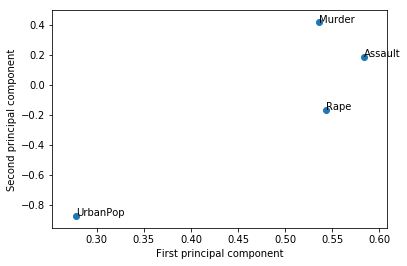

In [94]:
plt.scatter(comp_df[0], comp_df[1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )
    
plt.show()

In [95]:
states = pca.fit_transform(arrests_scaled)

In [97]:
comp_df = pd.DataFrame(states, index = arrests_scaled.index)
comp_df.head()

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


Plot observations on first and second principal components

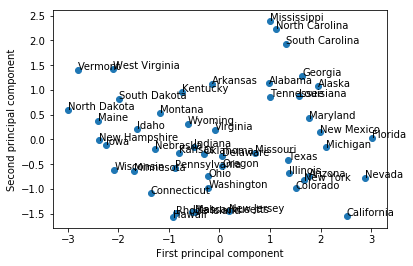

In [99]:
plt.scatter(comp_df[0], comp_df[1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )
    
plt.show()

Q2

In [43]:
from sklearn.cluster import KMeans

In [44]:
k2 = KMeans(n_clusters = 2, n_init = 20).fit(arrests_scaled)

labels attribute shows cluster membership

In [45]:
k2.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

Plot observations, color coded on cluster membership

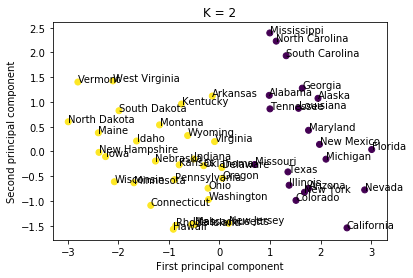

In [100]:
plt.scatter(comp_df[0], comp_df[1], c = k2.labels_)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K = 2')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )

plt.show()

States near each other in first-second PC space are grouped in the same cluster.

Q3

In [101]:
k3 = KMeans(n_clusters = 3, n_init = 20).fit(arrests_scaled)

Because K = 3, there are three cluster groups

In [103]:
k3.labels_

array([0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2,
       2, 1, 1, 2], dtype=int32)

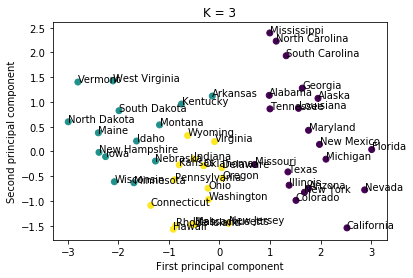

In [104]:
plt.scatter(comp_df[0], comp_df[1], c = k3.labels_)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K = 3')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )

plt.show()

Q4

In [105]:
k4 = KMeans(n_clusters = 4, n_init = 20).fit(arrests_scaled)

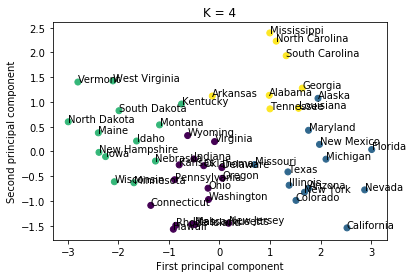

In [106]:
plt.scatter(comp_df[0], comp_df[1], c = k4.labels_)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('K = 4')
index = comp_df.index
for i, txt in enumerate(index):
    plt.annotate(txt, (comp_df[0][i], comp_df[1][i]) )

plt.show()

Insight from K-means clustering: 
Can we see similar states being grouped together? Geography could be a factor. The yellow group has a lot of Southern states, whilst Green and Purple have a lot of Northeastern states.

Q5: I do not understand what a 'score vector' is in this context.

Q6

In [47]:
from scipy.cluster import hierarchy

Apparently, hierarchy.complete uses 'complete linkage' and 'Euclidean clustering'.

Use unscaled 'arrests' data frame.

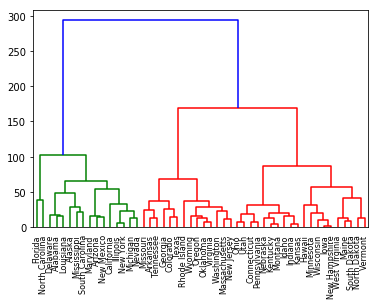

In [48]:
hc = hierarchy.complete(arrests)
hierarchy.dendrogram(hc, labels = arrests.index)
plt.show()

Q7

Manually cut dendogram at y = 125

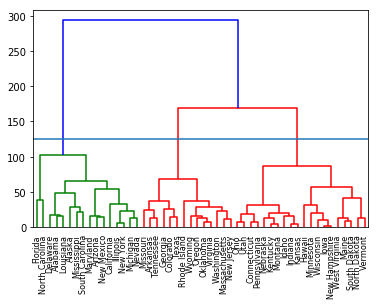

In [108]:
hc = hierarchy.complete(arrests)
hierarchy.dendrogram(hc, labels = arrests.index)
plt.axhline(y=125)
plt.show()

eg. in cluster 1: FL, NC, DE etc.

Q8

Use scaled 'arrests_scaled' data frame.

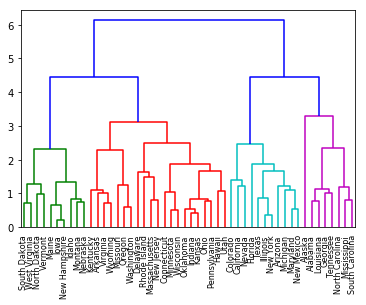

In [109]:
hc = hierarchy.complete(arrests_scaled)
hierarchy.dendrogram(hc, labels = arrests.index)
plt.show()

Scaling: variables are all at same scale. When unscaled, Assault overwhelms the process because it is at a much higher scale, as seen below.
When we scale, clustering happens quicker because data is more similar.
Y-Axis numbers are way smaller

In [112]:
arrests_scaled.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


##### Conclusion

PCA and clustering are complex statistical techniques to group together observations based upon a set of explanatory variables. I don't fully understand the mathematics underlying them, but can just about run them computationally. I don't fully understand the insight gained by grouping observations into clusters, or explaining variance using principal components.